# Subjectief vs objectief: methodologische MobileDNA 

In [14]:
#imports
import pandas as pd
import datetime as dt
import numpy as np
import itertools
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from pingouin import ttest

In [2]:
df = pd.read_excel("C:/Users/fdnecker/OneDrive - UGent/UGent/2019-2020/Doctoraat Floor/2019-2020/Methodologische MobileDNA paper/Data/200729_corona_inschatting.xlsx")

In [5]:
df.describe()

,Unnamed: 0,min_schatting,dagen,min_logdata,verschil
count,907.000000,907.000000,907.000000,907.000000,907.000000
mean,453.000000,175.588754,38.525910,212.419856,-36.831101
std,261.972645,131.290107,27.439481,131.226377,157.462763
min,0.000000,1.000000,6.000000,6.753696,-2154.773973
25%,226.500000,100.000000,15.000000,127.715005,-98.757842
50%,453.000000,150.000000,29.000000,197.134627,-31.416933
75%,679.500000,220.000000,60.500000,273.394316,27.722010
max,906.000000,2000.000000,91.000000,2214.773973,1724.750480


In [3]:
#enkel met data die maximaal mogelijk is < 60 x 24 (= 1440)
df_new = df[df['min_schatting'] < 1440]
df_newbis = df_new[df_new['min_logdata'] < 1440]

In [4]:
df_newbis.describe()

,Unnamed: 0,min_schatting,dagen,min_logdata,verschil
count,904.000000,904.000000,904.000000,904.000000,904.000000
mean,453.221239,172.299779,38.518805,210.107924,-37.808145
std,262.306406,108.684135,27.407989,113.256592,121.532722
min,0.000000,1.000000,6.000000,6.753696,-721.334858
25%,225.750000,100.000000,15.000000,127.555718,-98.716868
50%,453.500000,150.000000,29.000000,196.998650,-31.458603
75%,680.250000,219.250000,60.250000,272.858047,27.546195
max,906.000000,1000.000000,91.000000,751.334858,653.687252


#testen van de intercept hypothese
#STel dus dat het idee van de intercept hypothese klopt: Y = 0 is een perfecte inschatting als je de regressie van x = logdata en y = schatting bekijkt. Dan wil dat zeggen dat je als je voor min-schatting dezelfde data neemt als voor min-logdata, dan zou je inderdaad geen significante intercept mogen hebben. 

In [6]:
df_newbis['min_schatting_hyp'] = df_newbis['min_logdata']

C:\Users\fdnecker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_newbis.head()

,Unnamed: 0,id,surveyId,min_schatting,studyKey,dagen,min_logdata,schatting,verschil,min_schatting_hyp
0,0,007d6e4d-9546-41f6-9d0a-483da85fd275,19012000yuisuw,70,MYPHONE,80,95.848156,onder,-25.848156,95.848156
1,1,baae65a2-24a7-4ce3-b175-58b4a2a9b996,27081998jemaar,220,MYPHONE,91,163.185900,over,56.814100,163.185900
2,2,2a208c8b-3265-4c7f-8e6c-3c08ada72be3,01051999mamare,120,MYPHONE,91,224.907823,onder,-104.907823,224.907823
3,3,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,11041999matipe,200,MYPHONE,22,269.274821,onder,-69.274821,269.274821
4,4,44faff9d-3882-4777-85fc-8de262f3cbfa,23012020avanda,150,MYPHONE,62,164.986277,onder,-14.986277,164.986277


In [8]:
pg.linear_regression(df_newbis[['min_logdata']], df_newbis['min_schatting_hyp'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-6.870149e-14,2.337706e-15,-2.938842e+01,1.046878e-133,1.0,1.0,-7.328946e-14,-6.411351e-14
1,min_logdata,1.000000e+00,9.795164e-18,1.020912e+17,0.000000e+00,1.0,1.0,1.000000e+00,1.000000e+00


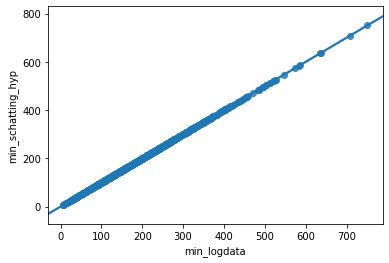

In [10]:
sns.regplot(x = df_newbis['min_logdata'], y= df_newbis['min_schatting_hyp'],marker='o')

In [9]:
pg.linear_regression(df_newbis[['min_logdata']], df_newbis['min_schatting'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,91.471608,6.986092,13.093387,5.470385e-36,0.160707,0.159777,77.760721,105.182494
1,min_logdata,0.384698,0.029272,13.142082,3.189436e-36,0.160707,0.159777,0.327249,0.442148


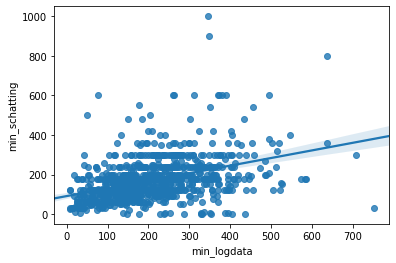

In [11]:
sns.regplot(x = df_newbis['min_logdata'], y= df_newbis['min_schatting'],marker='o')

Idee van sigificante intercept klopt volgens mij niet. 

Significante positieve regressie: hoe hoger de inschatting, hoe hoger de schatting. 

In [17]:
df_newbis.to_excel('df_newbis.xlsx')

## Significant verschil tussen subjectief en objectief? 

In [18]:
subj = df_newbis['min_schatting']
obj = df_newbis['min_logdata']

In [19]:
ttest(subj, obj, paired=True, tail= 'two-sided').round(2)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-9.35,903,two-sided,0.0,"[-45.74, -29.88]",0.34,4.471e+16,1.0


# Onderzoek van de D scores 

## Niet iedereen onderschatte zijn gemiddelde smartphonegebruik. 

In [21]:
df_newbis['schatting'].value_counts()/904

onder    0.646018
over     0.353982
Name: schatting, dtype: float64

In [26]:
 def threshold(row):
    waarde = row['verschil']
    
    if (waarde > -40) & (waarde < 40):
        return 'goed'
    elif (waarde < -40):
        return 'onder'
    else:
        return 'over'

df_newbis['threshold1'] = df_newbis.apply(threshold, axis=1)
df_newbis['threshold1'].value_counts()

C:\Users\fdnecker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


onder    425
goed     289
over     190
Name: threshold1, dtype: int64

In [30]:
df_newbis['threshold1'].value_counts()/904

onder    0.470133
goed     0.319690
over     0.210177
Name: threshold1, dtype: float64

In [27]:
 def threshold(row):
    waarde = row['verschil']
    
    if (waarde > -20) & (waarde < 20):
        return 'goed'
    elif (waarde < -20):
        return 'onder'
    else:
        return 'over'

df_newbis['threshold2'] = df_newbis.apply(threshold, axis=1)
df_newbis['threshold2'].value_counts()

C:\Users\fdnecker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


onder    495
over     251
goed     158
Name: threshold2, dtype: int64

In [31]:
df_newbis['threshold2'].value_counts()/904

onder    0.547566
over     0.277655
goed     0.174779
Name: threshold2, dtype: float64

In [28]:
 def threshold(row):
    waarde = row['verschil']
    
    if (waarde > -10) & (waarde < 10):
        return 'goed'
    elif (waarde < -10):
        return 'onder'
    else:
        return 'over'

df_newbis['threshold3'] = df_newbis.apply(threshold, axis=1)
df_newbis['threshold3'].value_counts()

C:\Users\fdnecker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


onder    531
over     283
goed      90
Name: threshold3, dtype: int64

In [32]:
df_newbis['threshold3'].value_counts()/904

onder    0.587389
over     0.313053
goed     0.099558
Name: threshold3, dtype: float64

In [29]:
 def threshold(row):
    waarde = row['verschil']
    
    if (waarde > -5) & (waarde < 5):
        return 'goed'
    elif (waarde < -5):
        return 'onder'
    else:
        return 'over'

df_newbis['threshold4'] = df_newbis.apply(threshold, axis=1)
df_newbis['threshold4'].value_counts()

C:\Users\fdnecker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


onder    556
over     299
goed      49
Name: threshold4, dtype: int64

In [33]:
df_newbis['threshold4'].value_counts()/904

onder    0.615044
over     0.330752
goed     0.054204
Name: threshold4, dtype: float64

# Percent stacked barplot

In [34]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd


In [35]:
#data
#5 kolommen: marge 40, 20, 10, 5, 0
r = [0, 1, 2, 3, 4]

#groene balken = onderschatting, oranje balken = goed, blauwe balken = overschatting
raw_data = {'greenBars': [47.01, 54.76, 58.74, 61.50, 64.60], 'orangeBars': [31.96, 17.48, 9.95, 5.42, 0], 'blueBars':[21.01, 27.22, 31.30, 33.08, 35.39]}
df = pd.DataFrame(raw_data)    

In [36]:
#from raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]


No handles with labels found to put in legend.


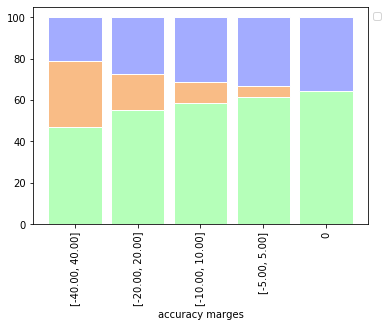

<Figure size 432x288 with 0 Axes>

In [46]:
#plot
barWidth = 0.85
names = ('[-40.00, 40.00]', '[-20.00, 20.00]', '[-10.00, 10.00]', '[-5.00, 5.00]', '0')
#creating bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names, rotation=90)
plt.xlabel("accuracy marges")

#add a legend
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1), ncol=1)

plt.show()

plt.savefig('stackedbar.png', dpi=400)

<Figure size 432x288 with 0 Axes>